# Problem Set 1

In this exercise, you need to read back the 311 datasets that you stored in Cloud Object Store and explore the dataset.

By the end of this exercise, you need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.

In [111]:
## Import important packages and set up notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.style.use('ggplot')
import matplotlib.cm as cm
import seaborn as sns

import pandas as pd
import pandas_profiling
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

import os, sys
import calendar
import matplotlib.pyplot as plt


## Some default plot settings
plt.rc('font', size=18)        
plt.rc('axes', titlesize=22)      
plt.rc('axes', labelsize=18)      
plt.rc('xtick', labelsize=12)     
plt.rc('ytick', labelsize=12)     
plt.rc('legend', fontsize=12)   

local = True
if (local):
    BASE_PATH = "../"
    
import warnings
warnings.filterwarnings('ignore')


In [112]:
df_311 = pd.read_csv(f"{BASE_PATH}nyc311.csv",index_col = 'unique_key')

In [113]:
print(df_311.shape)
df_311.head()

(5895877, 14)


,created_date,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
unique_key,,,,,,,,,,,,,,
44222420,2019-11-03T18:33:57.000,HEAT/HOT WATER,10472.0,1349 STRATFORD AVENUE,STRATFORD AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.832973,-73.876391,NaN,RESIDENTIAL BUILDING,Open
44221513,2019-11-03T22:42:28.000,HEAT/HOT WATER,11229.0,1714 AVENUE V,AVENUE V,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.596940,-73.953869,NaN,RESIDENTIAL BUILDING,Open
44222229,2019-11-03T17:58:40.000,HEAT/HOT WATER,10002.0,621 WATER STREET,WATER STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.711306,-73.983761,NaN,RESIDENTIAL BUILDING,Open
44217728,2019-11-03T21:36:21.000,HEAT/HOT WATER,11373.0,89-21 ELMHURST AVENUE,ELMHURST AVENUE,ADDRESS,Elmhurst,The complaint you filed is a duplicate of a co...,QUEENS,40.747420,-73.876853,NaN,RESIDENTIAL BUILDING,Open
44221452,2019-11-03T10:44:47.000,HEAT/HOT WATER,10467.0,3235 PARKSIDE PLACE,PARKSIDE PLACE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.874547,-73.874010,NaN,RESIDENTIAL BUILDING,Open


### Let's sum up the number of each unique complaint type in the data set

In [114]:
df_complaint = df_311['complaint_type'].value_counts()
df_complaint.head()

HEAT/HOT WATER          1171736
HEATING                  887869
PLUMBING                 705611
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     443007
Name: complaint_type, dtype: int64

### We can also plot the data to see the distribution

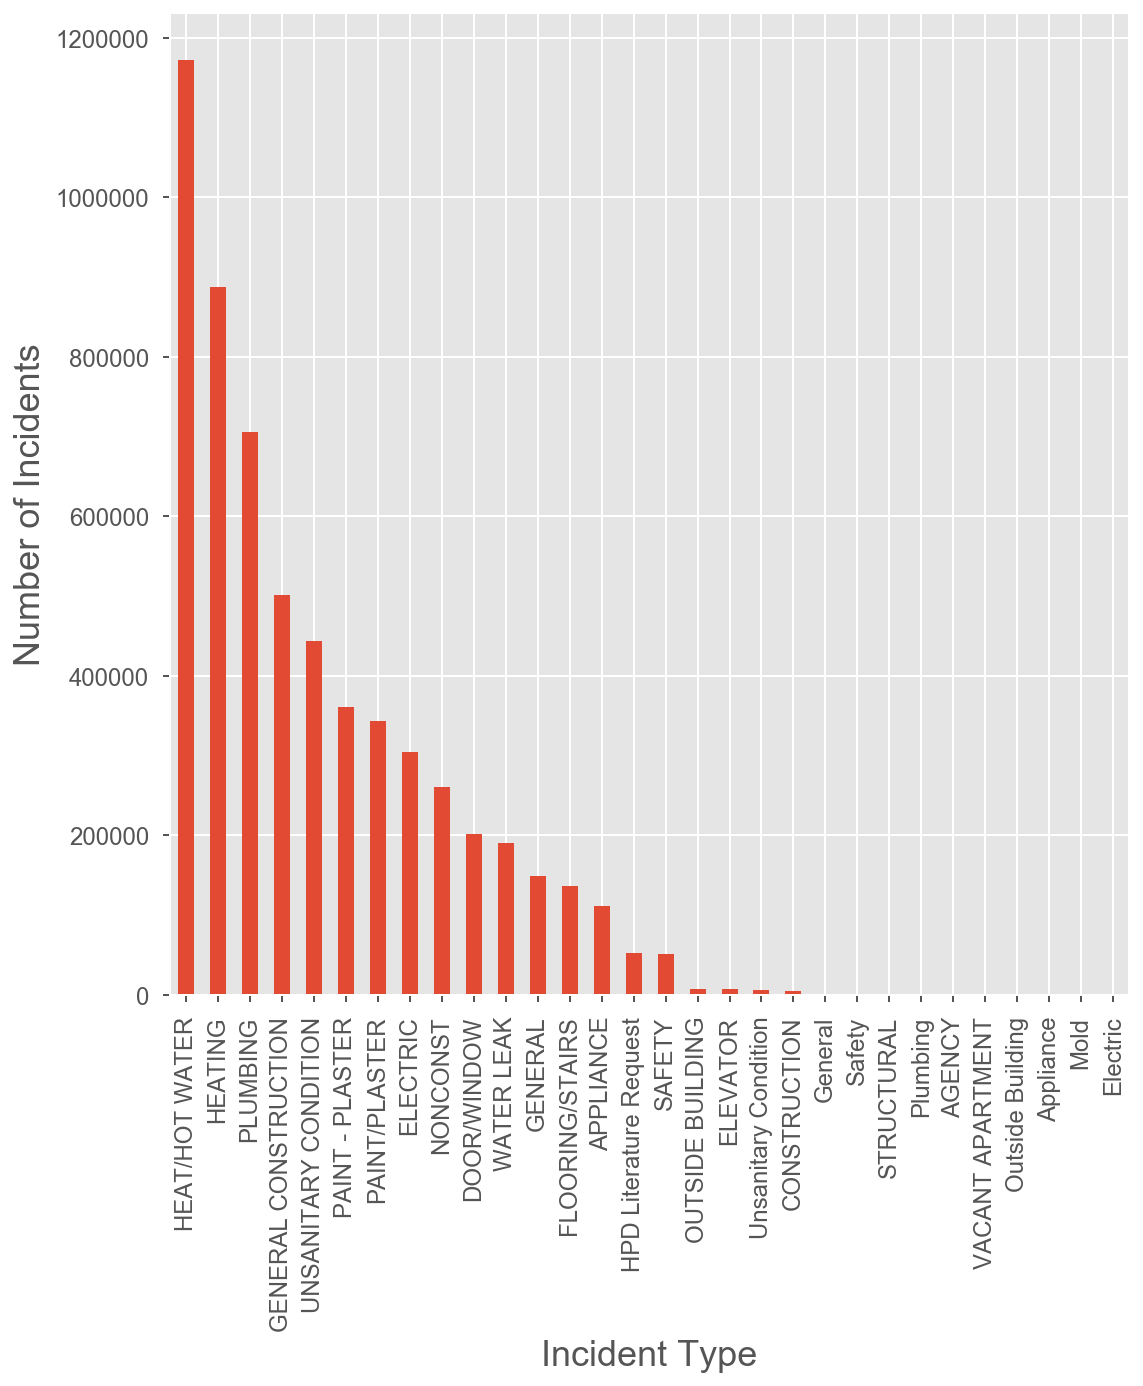

In [115]:
plt.figure(figsize=(8,8))
plt.ylabel('Number of Incidents')
plt.xlabel('Incident Type')
plt.tight_layout()
df_complaint.plot(kind='bar')

### It is clear from the bar plot that the primary complaint is HEAT/HOT Water. We can do better by scaling this to the percent vs a raw number

In [116]:
df_complaint = df_complaint.to_frame()
df_complaint['Percent'] = df_complaint['complaint_type']/df_complaint['complaint_type'].sum()*100
df_complaint.head()

,complaint_type,Percent
HEAT/HOT WATER,1171736,19.873820
HEATING,887869,15.059151
PLUMBING,705611,11.967872
GENERAL CONSTRUCTION,500863,8.495140
UNSANITARY CONDITION,443007,7.513844


### As a sanity check sum up percent to make sure = 100

In [117]:
display('The sum of percents is %.2f' %(df_complaint['Percent'].sum()))

'The sum of percents is 100.00'

### If we remake the histogram now it will be more meaningful, droping Incidents with less than 0.5%

,complaint_type,Percent
HEAT/HOT WATER,1171736,19.873820
HEATING,887869,15.059151
PLUMBING,705611,11.967872
GENERAL CONSTRUCTION,500863,8.495140
UNSANITARY CONDITION,443007,7.513844


<Figure size 576x576 with 0 Axes>

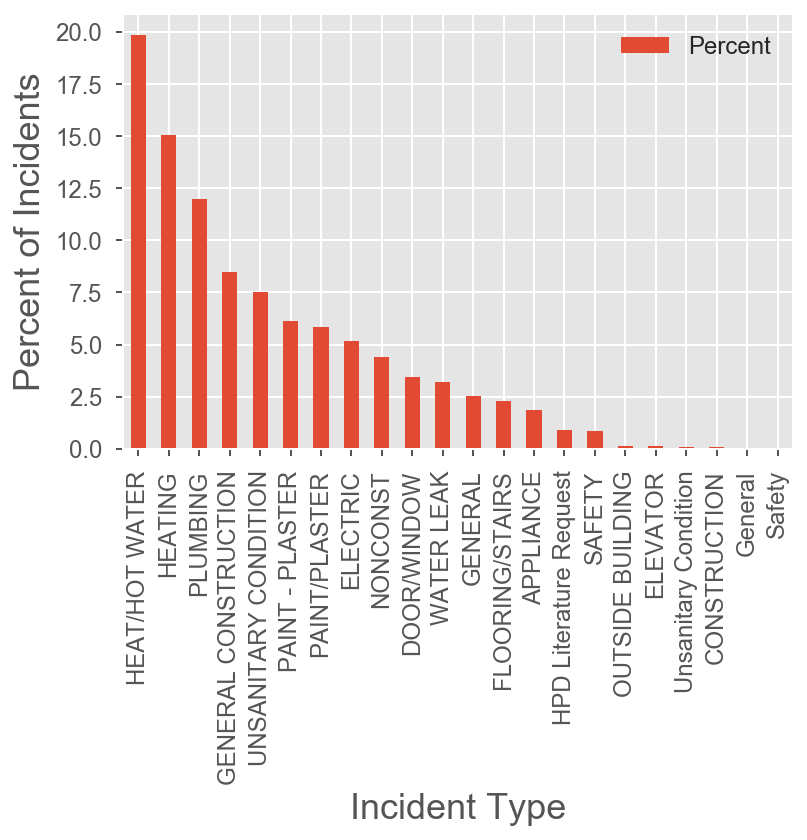

In [118]:
df = df_complaint[df_complaint['Percent']>0.005]
display(df.head())
plt.figure(figsize=(8,8))
df.plot(kind='bar', y = 'Percent')
plt.ylabel('Percent of Incidents')
plt.xlabel('Incident Type')
#plt.tight_layout()
plt.show()

## Question: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

### Answer: The Department of Housing Preservation and Development of NYC should first focus on HEAT/HOT WATER complaints since they make up about 20% of all the complaints filed. Second they should focus on Heating as it makes up an additional 15% for a total of 35% of the complaints between the two types.